<a href="https://colab.research.google.com/github/lari-nunes/Calculadora-IMC/blob/master/TDE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos a biblioteca pandas.
Atribuimos a variável df o DataFrame resultante do método read_csv do pandas. 
O método read_csv lê arquivos csv o os converte em DataFrame.

In [4]:
import pandas as pd
df = pd.read_csv('baseBancoDigital.csv', sep = ';')

ele importa o arquivo diretamente do banco de dados pandas e roda o arquivo csv "baseBancoDigital" na variável DateFrame. 

##Responda:
###Qual tipo de fonte de dados estamos utilizando neste projeto?

Vererifique o tipo abaixo é DataFrame

In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


ele é um tipo csv usando por ;

###Execute o código abaixo:

In [5]:
df.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


é gerado por uma planilha do excel "csv" 

##Responda:
### O que faz o método head()?

ele é usado para exibir as primeiras linhas de um conjunto de dados. 

Podemos isolar uma coluna específica do DataFrame, veja:



In [ ]:
df['Estado']

0      RS
1      SC
2      RS
3      RS
4      SC
       ..
994    SC
995    SC
996    SC
997    SC
998    PR
Name: Estado, Length: 999, dtype: object

O método describe() exibe as variáveis estatísticas da coluna selecionada no DataFrame.



In [ ]:
df['Estado'].describe()

count     999
unique      6
top        RS
freq      478
Name: Estado, dtype: object

###Interpretando os dados acima:

count: número de linhas do dataframe

unique: quantidade de valores distintos da coluna Estado

top: valor com maior recorrência na coluna Estado

freq: quantidade de vezes que o top se repete

Name: nome da coluna

dtype: tipo de dado que a coluna recebe

##Execute o método abaixo: 
O método info() exibe o nome das colunas do dataframe.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              999 non-null    int64  
 1   Score           999 non-null    int64  
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    int64  
 5   Patrimonio      999 non-null    int64  
 6   Saldo           999 non-null    int64  
 7   Produtos        999 non-null    int64  
 8   TemCartCredito  999 non-null    int64  
 9   Ativo           999 non-null    int64  
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


ele resumo as informações de colunas e identidades

##Execute o código abaixo:
O método hist() exibe um histograma dos dados numéricos do dataframe.

In [ ]:
df.hist()

transforma as informações pra arquivo de gráfico

O método isnull() retorna um booleano indicando se o dado é nulo ou não, utilizamos o método sum() para somar os valores true.

In [ ]:
df.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

##Faça uma análise
Analise os dados da tabela acima, citando quais colunas do dataframe possuem valores nulos e o que isso poderia representar como resultado.

O método groupby() permite realizar agrupamentos, mas atenção, sempre que utilizar um agrupamento deve ser utilizada uma função de grupo como soma, média, mediana, contagem.

In [ ]:
df.groupby('Estado').size()

##Execute o código abaixo e responda:
###Pela sua percepção, o que faz o método corr()? 

In [ ]:
df.corr()

A propriedade plot, permite exibir gráficos.

<Axes: >

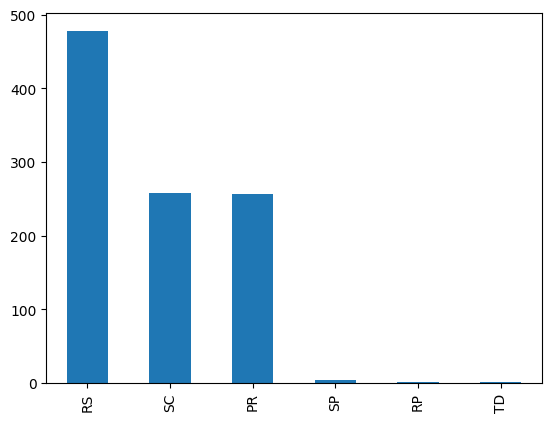

In [ ]:
df['Estado'].value_counts().plot.bar()

Agora considere o seguinte: Na regra de negócio do banco digital, são aceitos apenas clientes da região sul. Verifique que o DataFrame tem estados inválidos como "TD" e "SP". Então precisaremos realizar uma limpeza desses dados.
Abaixo listamos os dados estatísticos para buscar pelo estado que mais se repete (Moda). A moda pode ser identificada como "top".
 

In [ ]:
df['Estado'].describe()

count     999
unique      6
top        RS
freq      478
Name: Estado, dtype: object

Então realizamos a substituição de qualquer estado que estiver fora do domínio (Região Sul) para ser substituído pela moda "RS".

In [ ]:
estadosDoSul = ['RS','SC','PR']
estadosValidos = df['Estado'].isin(estadosDoSul) #Retorna um DataFrame de Booleanos caso o estado combine com o array estadosDoSul
df.loc[~estadosValidos,'Estado'] = 'RS' # O ~ indica negação, ou seja o método ira localizar os estados que não sejam válidos.

<Axes: >

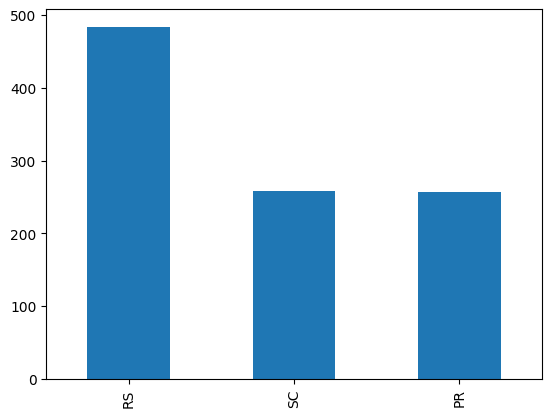

In [ ]:
df['Estado'].value_counts().plot.bar()

Observe que temos 7 salários sem valor, iremos preenche-los com a média salarial.

In [ ]:
df['Salario'].isnull().sum()

7

O método mean() exibe a média.

In [ ]:
mediaSalarial = df['Salario'].mean()
mediaSalarial


35287620.25100806

Utilizamos a propriedade loc para buscar pelos valores de salário nulos. Em seguida atribuimos a média salarial a eles.

In [ ]:
df.loc[df['Salario'].isnull(), 'Salario'] = mediaSalarial;

###Faça uma análise descritiva da coluna Gênero, encontre os problemas e realize a higienização dos dados.

<Axes: >

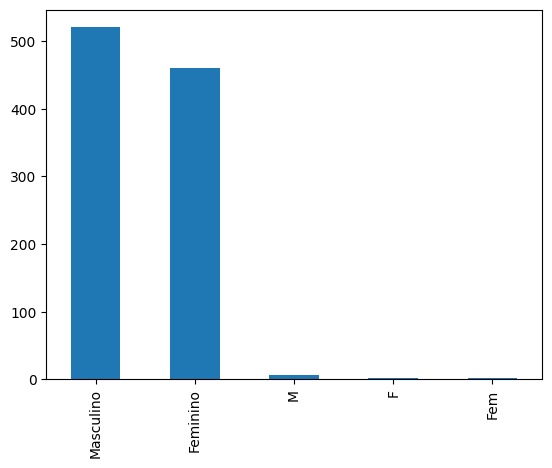

In [ ]:
df['Genero'].value_counts().plot.bar()

##Faça uma análise descritiva da coluna Idade, encontre os problemas e faça a higienização dos dados.

In [ ]:
df['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64